## IMPORT THE MODULES

In [114]:
#import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import missingno as msno
from IPython.display import display
from sklearn.preprocessing import OrdinalEncoder
sns.set()
import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATASET

In [115]:
#load the dataset
data = pd.read_csv('./DentalData1011.csv')
data.head()

,Timestamp,Patient Number,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",...,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
0,31/10/2023 08:55:03,M30,Pain,aching,Mild,lingering pain,No,No,No,No,...,No,No,No,No,No,No,Pulpitis,No,No,No
1,31/10/2023 09:11:12,F21,Pain,aching,Mild,The pain came suddenly,Eating,No,No,No,...,No,No,No,No,No,No,Food impaction,No,No,No
2,31/10/2023 09:28:50,M20,Swelling,throbbing,Moderate,lingering pain,Hot foods or drinks,No,No,No,...,No,No,No,No,No,No,Pulpitis with swelling,No,No,No
3,31/10/2023 09:29:47,F34,Pain,throbbing,Severe,The pain came suddenly,Hot foods or drinks,No,No,No,...,No,No,No,No,No,No,Acute pulpitis,No,No,No
4,31/10/2023 09:36:48,F5,Swelling,No,No,No,No,No,Slow,No,...,No,No,No,No,No,No,Periodontal abcess,No,No,No


In [116]:
y = data['Final Diagnosis']
classes=y.unique()
print(len(classes))

44


In [117]:
#checkout what all the classes are and number  of cases
class_counts = y.value_counts()
for c in classes:
    print(f'Number of {c}: {class_counts[c]}')

Number of Pulpitis: 1
Number of Food impaction: 1
Number of Pulpitis with swelling : 1
Number of Acute pulpitis: 1
Number of Periodontal abcess: 1
Number of Acute pulpits : 20
Number of Acute Pulpitis : 2
Number of Acute pulpits with acute gingivitis : 1
Number of Pulpits : 2
Number of Chronic destructive periodontitis: 1
Number of Acute pulpits with extra oral swelling : 1
Number of Aphthous ulcer: 2
Number of Acute pulpits with extra oral swelling: 1
Number of Acute reversible pulpits : 1
Number of Reversible pulpits : 32
Number of Acute gingivitis : 2
Number of Pulpits with swelling : 5
Number of Aphthous ulcer : 6
Number of Chronic pulpits with swelling : 1
Number of Dental caries with food impaction: 1
Number of Extra oral swelling with pulpits: 1
Number of Reversible pulpits with food impaction: 1
Number of Irreversible pulpitis: 1
Number of Extra oral swelling with irreversible pulpits : 3
Number of Periodontitis with grade 2 tooth mobility : 1
Number of Acute irreversible pulpi

<AxesSubplot:xlabel='count', ylabel='Final Diagnosis'>

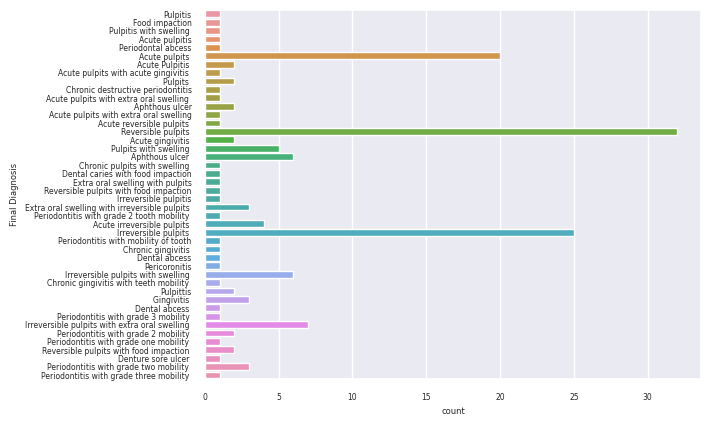

In [118]:
#plot and see the data
sns.set(font_scale=0.5)
sns.countplot(y=y, label="Number of cases")

## DATA PREPROCESSING

In [121]:
# data['Final Diagnosis']=data['Final Diagnosis'].str.replace('Pulpits','Irreversible Pulpits')
data['Chief complaint']=data['Chief complaint'].str.replace('Ulecer','Ulcer')
misspelled = {
    'Pulpits': 'Pulpitis', 
    'Pulpittis': 'Pulpitis',
    'pulpits': 'Pulpitis',
    'Acute pulpitis': 'Acute Pulpitis',
    'Periodontitis with grade two mobility':'Periodontitis',
    'Periodontitis with grade three mobility':'Periodontitis',
    'Periodontitis with grade one mobility':'Periodontitis',
    'Periodontitis with grade 1 mobility':'Periodontitis',
    'Periodontitis with grade 2 mobility':'Periodontitis',
    'Periodontitis with grade 3 mobility':'Periodontitis',
    'Periodontitis with mobility of tooth':'Periodontitis',
    'Periodontitis with grade 2 tooth mobility':'Periodontitis',
}
for word, correct in misspelled.items():
    data['Final Diagnosis'] = data['Final Diagnosis'].str.replace(word, correct)
# data['Final Diagnosis']=data['Final Diagnosis'].str.replace('Pulpitis','Irreversible Pulpits')
# data['Final Diagnosis']=data['Final Diagnosis'].str.replace('Pulpits','Irreversible Pulpits')
data['Final Diagnosis']=data['Final Diagnosis'].str.replace('Irreversible Irreversible Pulpitis with swelling','Irreversible Pulpitis with swelling')
data['Final Diagnosis']=data['Final Diagnosis'].str.replace('Irreversible Irreversible Pulpitis','Irreversible Pulpitis')
data['Final Diagnosis']=data['Final Diagnosis'].str.replace('Irreversible Pulpitis with swelling','Irreversible Pulpitis with extra oral swelling')

In [145]:
y_new = data['Final Diagnosis']
classes_new = y_new.unique()
print(len(classes_new))
class_counts_new = y.value_counts()
for c in classes_new:
    print(f'Number of {c}: {class_counts_new[c]}')

# sns.set(font_scale=0.5)
# sns.countplot(y=y_new,label='Number of cases')

35
Number of Pulpitis: 3
Number of Food impaction: 1
Number of Pulpitis with swelling : 6
Number of Acute Pulpitis: 1
Number of Periodontal abcess: 1
Number of Acute Pulpitis : 22
Number of Acute Pulpitis with acute gingivitis : 1
Number of Pulpitis : 2
Number of Chronic destructive periodontitis: 1
Number of Acute Pulpitis with extra oral swelling : 1
Number of Aphthous ulcer: 2
Number of Acute Pulpitis with extra oral swelling: 1
Number of Acute reversible Pulpitis : 1
Number of Reversible Pulpitis : 32
Number of Acute gingivitis : 2
Number of Aphthous ulcer : 6
Number of Chronic Pulpitis with swelling : 1
Number of Dental caries with food impaction: 1
Number of Extra oral swelling with Pulpitis: 1
Number of Reversible Pulpitis with food impaction: 1
Number of Irreversible pulpitis: 1
Number of Extra oral swelling with irreversible Pulpitis : 3
Number of Periodontitis : 9
Number of Acute irreversible Pulpitis : 4
Number of Irreversible Pulpitis : 25
Number of Periodontitis: 1
Number 

In [123]:
# look out for null values
data.isnull().sum()

Timestamp                                                                              0
Patient Number                                                                         0
Chief complaint                                                                        1
Nature of Pain                                                                         5
Severity of pain                                                                       6
Onset  and mode of pain                                                               14
Factors which worsens the pain                                                        11
Is the swelling painful?                                                              82
Has the swelling changed since it was first noticed? If yes how quickly?              81
Does the swelling changes during normal activities such as eating, speaking, etc?     81
Is the ulcer painful                                                                  99
Is there bleeding fro

In [124]:
# filling in missing values and checking again
data.fillna("No",inplace=True)
print(data.isnull().sum())
data.sample(10)


Timestamp                                                                            0
Patient Number                                                                       0
Chief complaint                                                                      0
Nature of Pain                                                                       0
Severity of pain                                                                     0
Onset  and mode of pain                                                              0
Factors which worsens the pain                                                       0
Is the swelling painful?                                                             0
Has the swelling changed since it was first noticed? If yes how quickly?             0
Does the swelling changes during normal activities such as eating, speaking, etc?    0
Is the ulcer painful                                                                 0
Is there bleeding from the ulcer           

,Timestamp,Patient Number,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",...,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
13,03/11/2023 09:09:46,M10,Pain,throbbing,Severe,The pain came suddenly,Laying down,No,No,No,...,No,No,No,No,No,No,Acute Pulpitis,No,No,No
39,03/11/2023 11:10:34,F32,Pain,aching,Mild,lingering pain,Laying down,No,No,No,...,No,No,No,No,No,No,Acute Pulpitis,No,No,No
25,03/11/2023 10:12:05,F43,Pain,aching,Mild,The pain came suddenly,Cold foods or drinks,No,No,No,...,No,No,No,No,No,No,Reversible Pulpitis,No,No,No
130,10/11/2023 08:50:31,M65,Pain,throbbing,Mild,The pain came suddenly,Cold foods or drinks,No,No,No,...,No,No,No,No,No,No,Reversible Pulpitis,No,No,No
15,03/11/2023 09:15:40,F49,Pain,throbbing,Moderate,No,Laying down,No,No,No,...,No,No,No,No,No,No,Acute Pulpitis,No,No,No
139,10/11/2023 11:12:52,M43,Pain,throbbing,Mild,No,Cold foods or drinks,No,No,No,...,No,No,No,No,No,No,Reversible Pulpitis,No,No,No
99,07/11/2023 10:32:29,F65,Swelling,aching,Severe,No,Hot foods or drinks,Yes,Slow,No,...,No,No,No,No,No,No,Irreversible Pulpitis with extra oral swelling,No,No,No
121,10/11/2023 08:43:36,F40,Pain,throbbing,Mild,The pain came suddenly,Cold foods or drinks,No,No,No,...,No,No,No,No,No,No,Reversible Pulpitis,No,No,No
2,31/10/2023 09:28:50,M20,Swelling,throbbing,Moderate,lingering pain,Hot foods or drinks,No,No,No,...,No,No,No,No,No,No,Pulpitis with swelling,No,No,No
89,06/11/2023 17:42:11,M45,Swelling,throbbing,Severe,The pain came suddenly,Hot foods or drinks,Yes,Rapid,No,...,No,No,No,No,No,No,Dental abcess,No,No,3


In [125]:
#Dropping unnecessary fields
data.drop('Timestamp',axis=1, inplace=True)
data.drop('Patient Number',axis=1, inplace=True)
data.sample(5)

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
31,Pain,aching,Mild,lingering pain,Cold foods or drinks,No,No,No,No,No,No,No,No,No,No,Reversible Pulpitis,No,No,No
104,Swelling,throbbing,Severe,The pain came suddenly,Laying down,No,Slow,No,No,No,No,No,No,No,No,Irreversible Pulpitis with extra oral swelling,No,No,No
153,Pain,stabbing,Severe,The pain came suddenly,Hot foods or drinks,No,No,No,No,No,No,No,No,No,No,Irreversible Pulpitis,No,No,No
14,Pain,stabbing,Severe,No,Laying down,No,No,No,No,No,No,No,No,No,No,Acute Pulpitis,No,No,No
151,No,throbbing,Moderate,lingering pain,Eating,No,No,No,No,No,No,No,No,No,No,Periodontitis,No,Yes,2


In [126]:
# #split the patient number into gender and age
# data['Gender'] = data['Patient Number'].str[0]
# data['Age'] = data['Patient Number'].str[1:].astype(int)
# data.sample(5)

In [127]:
#using ordinal encoder to change the fields to numerical values
encode=OrdinalEncoder(dtype=float)
# data_noage = data.drop('Age',axis=1)
# patient_encode=pd.DataFrame(encode.fit_transform(data_noage),columns=data_noage.columns)
patient_encode=pd.DataFrame(encode.fit_transform(data),columns=data.columns)
# patient_encode = pd.concat([patient_encode,data['Age']],axis=1) 
patient_encode.head(5)

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
0,1.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,3.0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,3.0
2,2.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,3.0
3,1.0,4.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2.0,0.0,2.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,3.0


In [128]:
patient_encode.to_csv('./DentalData811_encoded.csv',index=False)

In [142]:
train,test=train_test_split(patient_encode,test_size=0.2, random_state=42)
print(len(train))
print(len(test))

123
31


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train = train.drop(columns=['Final Diagnosis'])
y_train = train['Final Diagnosis']


X_test = test.drop(columns=['Final Diagnosis'])  
y_test = test['Final Diagnosis']


rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.estimators_ = [DecisionTreeClassifier() for _ in range(100)] 

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = rf.score(X_test, y_test) 

print("Random Forest Accuracy:",rf_accuracy)

Random Forest Accuracy: 0.6774193548387096


In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score

# Train model
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)

# Calculate F1 score 
f1 = f1_score(y_test, rf_pred, average='weighted')
print("F1 score:", f1)

# Can also calculate other scores
precision = precision_score(y_test, rf_pred, average='weighted')  
recall = recall_score(y_test, rf_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

F1 score: 0.5868663594470046
Precision: 0.5447004608294931
Recall: 0.6774193548387096


In [134]:
from sklearn.utils import resample

# Resample training data
X_resampled, y_resampled = resample(X_train, y_train, n_samples=len(X_train)*2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

# Evaluate
rf_pred = rf.predict(X_test)
f1 = f1_score(y_test, rf_pred, average='weighted')
print('F1 Score:', f1)

F1 Score: 0.49247311827956985


In [135]:
print(X_train.shape[1])

18


In [136]:
from imblearn.ensemble import BalancedBaggingClassifier

# Bagging classifier with random undersampling
bbc = BalancedBaggingClassifier(base_estimator=rf,
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=42)

# Train on imbalanced data
bbc.fit(X_train, y_train) 

# Predict on test set
y_pred = bbc.predict(X_test)

# Evaluate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, rf_pred, average='weighted')
print('F1 Score:', f1)
print('Recall Score:', recall)

F1 Score: 0.3870967741935484
Recall Score: 0.5483870967741935


In [137]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
f1=f1_score(y_test, y_pred, average="weighted")
recall=recall_score(y_test,rf_pred, average="weighted")
print("F1 Score:", f1)
print("Recall Score:", recall)


F1 Score: 0.3870967741935484
Recall Score: 0.5483870967741935


In [138]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Extract X and y
X_train = train.drop('Final Diagnosis', axis=1) 
y_train = train['Final Diagnosis']

X_test = test.drop('Final Diagnosis', axis=1)
y_test = test['Final Diagnosis']

# Create LogisticRegression instance 
logreg = LogisticRegression()

# Fit on training data
logreg.fit(X_train, y_train)  

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", 
      accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.5161290322580645
